# EXPLORATORY DATA ANALYSIS (EDA)

In this exercise, we will be performing Exploratory Data Analysis (EDA) using the dataset Cars93.

In the second part, we will build a Linear Regression Model for the same dataset.

First, we will ask Gemini which Python libraries are needed to load .csv files and also to perform Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical data visualization

Next, let us load Car93.csv dataset.  Note that we need to specify the directory in which the data file is located.  In this case, it is located in sample_data folder.

Not working? ... ask Gemini ... "How do I read a data file located in sample_data folder?".  This will get you the answer.



In [2]:
# Read Cars_Price.csv data file
df = pd.read_csv('Cars93.csv')

In [ ]:
# Display Top rows in the dataset
df.head()

In [ ]:
# Display Dimensions of the dataset
df.shape

(93, 28)

**Observations:**  
There are 93 Rows and 28 Columns in the dataset

In [ ]:
# Display Data types of Variables
df.dtypes

,0
Unnamed: 0,int64
Manufacturer,object
Model,object
Type,object
Min.Price,float64
Price,float64
Max.Price,float64
MPG.city,int64
MPG.highway,int64
AirBags,object


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,34


**Observations**  
Missing values found in AirBags, Rear.seat.room and Luggage.room variables

# For this exercise, we will focus on Price, Cylinders, EngineSize, MPG.city, Manufacturer and Origin fields

In [12]:
# Generate Summary Statistics for Price, Cylinders, EngineSize, MPG.city variables
df[['Price', 'Cylinders', 'EngineSize', 'MPG.city']].describe()

,Price,EngineSize,MPG.city
count,93.000000,93.000000,93.000000
mean,19.509677,2.667742,22.365591
std,9.659430,1.037363,5.619812
min,7.400000,1.000000,15.000000
25%,12.200000,1.800000,18.000000
50%,17.700000,2.400000,21.000000
75%,23.300000,3.300000,25.000000
max,61.900000,5.700000,46.000000


It would be easier if we can Visualize the data above - Right??

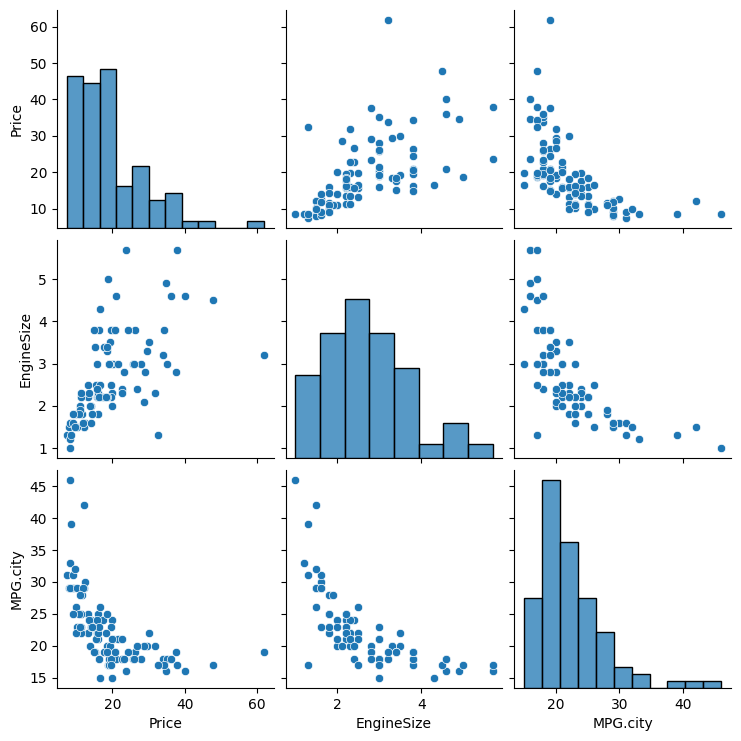

In [ ]:
# Visualize distribution of the fields mentioned above
sns.pairplot(df[['Price', 'Cylinders', 'EngineSize', 'MPG.city']])
plt.show()

**Observations:**  
1.   Most of the cars are Priced less than 20k.
2.   However, there are cars that are Priced above 60k.
3.   Most of the cars have EngineSize less than 4.
4.   However, there are a few cars with EngineSize > 4
5.   Most cars have MPG.city less than 30.
6.   However, there are a few cars who mileage is > 40
7.   From the Scatter Plot, we notice that Price increases as EngineSize increases - There is a Positive Correlation.
8.   However, Price Decreases as MPG.city Increases - There is a Negative Correlation.
9.   Similarly, as EngineSize Increases, MPG.city Decreases.



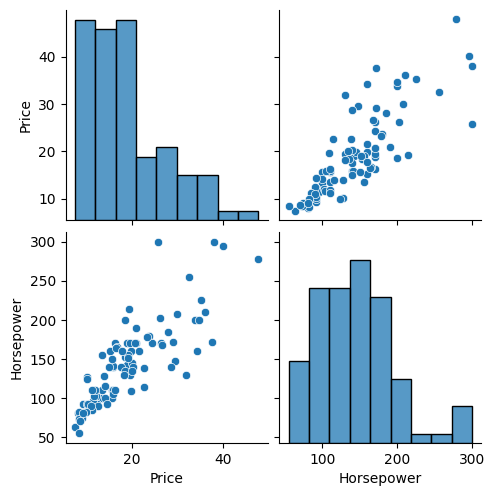

In [34]:
# Create pairwise plot for Price and Horsepower
sns.pairplot(df[['Price', 'Horsepower']])
plt.show()



---
Now let us Visualize the Categorical Fields namely, Manufacturer and Origin


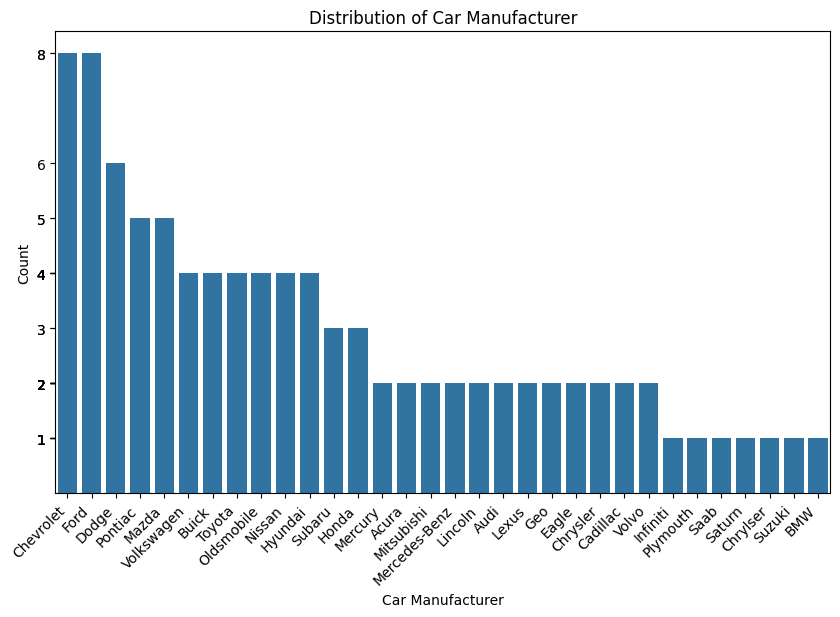

In [21]:
# Count the occurrences of each car Manufacturer
manufacturer_counts = df['Manufacturer'].value_counts()

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=manufacturer_counts.index, y = manufacturer_counts.values)  # Using countplot for direct plotting
plt.xlabel('Car Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Car Manufacturer')

# Set y-axis ticks and labels to display actual numbers
plt.yticks(manufacturer_counts.values)  # Use actual counts as ticks

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

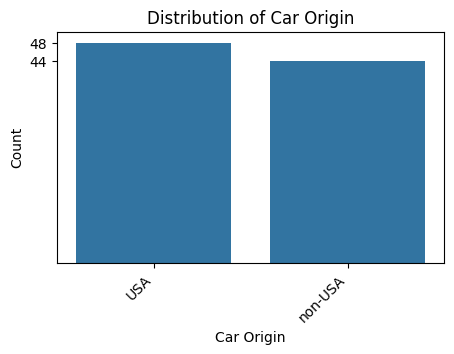

In [12]:
# Generate a Barplot for Origin variable

# Count the occurrences of each car Origin
origin_counts = df['Origin'].value_counts()

# Create the bar plot using Seaborn
plt.figure(figsize=(5, 3))  # Adjust figure size if needed
sns.barplot(x=origin_counts.index, y = origin_counts.values)  # Using countplot for direct plotting
plt.xlabel('Car Origin')
plt.ylabel('Count')
plt.title('Distribution of Car Origin')

# Set y-axis ticks and labels to display actual numbers
plt.yticks(origin_counts.values)  # Use actual counts as ticks

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



---
### **Outlier Analysis**  
Let us look for Outliers in Price


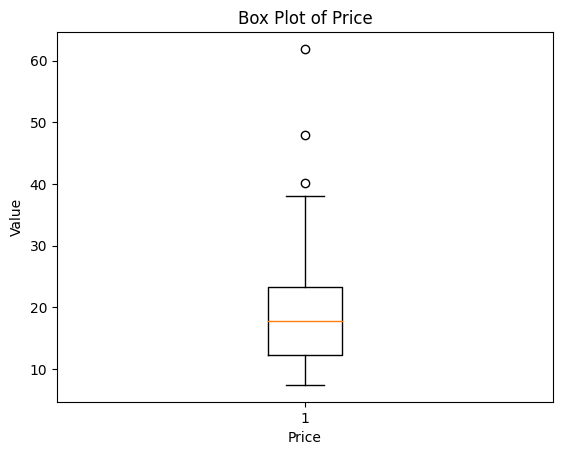

In [21]:
# Check for Outliers in Price
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.ylabel('Value')
plt.title('Box Plot of Price')
plt.show()

In [22]:
# Identify the 3 Outliers for Price
outliers = df[df['Price'] > 40]
print(outliers)

    Unnamed: 0   Manufacturer    Model     Type  Min.Price  Price  Max.Price  \
10          11       Cadillac  Seville  Midsize       37.5   40.1       42.7   
47          48       Infiniti      Q45  Midsize       45.4   47.9       50.4   
58          59  Mercedes-Benz     300E  Midsize       43.8   61.9       80.0   

    MPG.city  MPG.highway             AirBags  ... Passengers Length  \
10        16           25  Driver & Passenger  ...          5    204   
47        17           22         Driver only  ...          5    200   
58        19           25  Driver & Passenger  ...          5    187   

    Wheelbase  Width  Turn.circle  Rear.seat.room Luggage.room  Weight  \
10        111     74           44            31.0         14.0    3935   
47        113     72           42            29.0         15.0    4000   
58        110     69           37            27.0         15.0    3525   

     Origin                Make  
10      USA    Cadillac Seville  
47  non-USA        Infini

**Observation:**  
Cadillac and Infiniti are less than 50k.  So we will retain them.

However, Mercedes-Benz 300E is the only car priced above 60k.  This can be considered as an Outlier.  Therefore, we will remove this record.

In [23]:
# Remove the record where Manufacturer is "Mercedes-Benz" and Model is "300E"
df = df[~((df['Manufacturer'] == 'Mercedes-Benz') & (df['Model'] == '300E'))]

In [24]:
# Recheck if the record was deleted
outliers = df[df['Price'] > 40]
print(outliers)

    Unnamed: 0 Manufacturer    Model     Type  Min.Price  Price  Max.Price  \
10          11     Cadillac  Seville  Midsize       37.5   40.1       42.7   
47          48     Infiniti      Q45  Midsize       45.4   47.9       50.4   

    MPG.city  MPG.highway             AirBags  ... Passengers Length  \
10        16           25  Driver & Passenger  ...          5    204   
47        17           22         Driver only  ...          5    200   

    Wheelbase  Width  Turn.circle  Rear.seat.room Luggage.room  Weight  \
10        111     74           44            31.0         14.0    3935   
47        113     72           42            29.0         15.0    4000   

     Origin              Make  
10      USA  Cadillac Seville  
47  non-USA      Infiniti Q45  

[2 rows x 28 columns]




---

### **Missing Values Treatment**  
Earlier we noticed that the Luggage field had 11 Missing values.  Let us calculate the Mean for Luggage and impute the Mean in those Missing cells.

In [25]:
# Calculate the Mean for Luggage.room and use the Mean to impute for Missing values
mean_luggage = df['Luggage.room'].mean()
df['Luggage.room'].fillna(mean_luggage, inplace=True)

<ipython-input-25-05b756a19298>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Luggage.room'].fillna(mean_luggage, inplace=True)


In [26]:
# Check for missing values in the Luggage.room
df['Luggage.room'].isnull().sum()

0



---

# **LINEAR REGRESSION**

### Split data into Training and Test datasets

In [27]:
# Split the data into Training and Test datasets in the ratio 80:20
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

In [28]:
# Create a Linear Regression Model for Mileage and Price using train_df dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_df[['Horsepower']], train_df['Price'])

LinearRegression()

In [29]:
# Display the output of Linear Regression Model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [0.16620593]
Intercept: -3.799238012531184


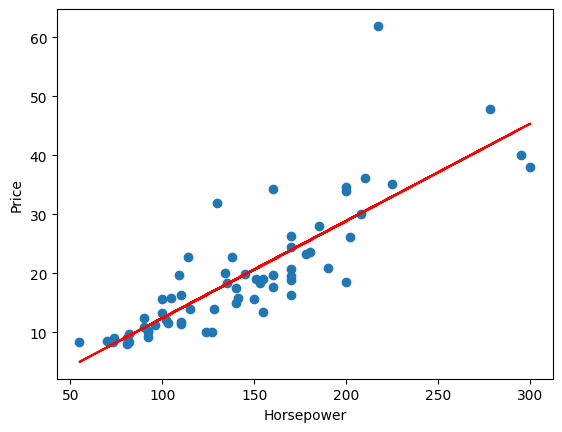

In [24]:
# Create a plot of Linear Regression
plt.scatter(train_df['Horsepower'], train_df['Price'])
plt.plot(train_df['Horsepower'], model.predict(train_df[['Horsepower']]), color='red')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

In [30]:
# Display Model Performance Metrics including MAE, MSE, RMSE and R-squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(train_df[['Horsepower']])

# Calculate performance metrics
mae = mean_absolute_error(train_df['Price'], y_pred)
mse = mean_squared_error(train_df['Price'], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(train_df['Price'], y_pred)

# Calculate Adjusted R-squared
n = len(df)  # Number of observations
k = 1  # Number of independent variables (Mileage)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Display the metrics
print('Model Performance Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)
print('Adjusted R-squared:', adjusted_r2)



Model Performance Metrics:
MAE: 3.986003891535835
MSE: 38.436317388732114
RMSE: 6.199703008107091
R-squared: 0.6349080635578046
Adjusted R-squared: 0.630896064256242


**Observations:**  
R-squared of 0.634 is decently good.  Let us test the model using test_df dataset.

In [31]:
# Run the Linear Regression model using test_df dataset
# Make predictions
y_pred = model.predict(test_df[['Horsepower']])

# Calculate performance metrics
mae = mean_absolute_error(test_df['Price'], y_pred)
mse = mean_squared_error(test_df['Price'], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_df['Price'], y_pred)

# Calculate Adjusted R-squared
n = len(df)  # Number of observations
k = 1  # Number of independent variables (Mileage)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Display the metrics
print('Model Performance Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)
print('Adjusted R-squared:', adjusted_r2)


Model Performance Metrics:
MAE: 4.2091985752957095
MSE: 31.968513520058256
RMSE: 5.654070526625774
R-squared: 0.4853156819604688
Adjusted R-squared: 0.4796598103336608


**Observations:**  
The R-squared has dropped to 0.485 suggesting that the model needs more training so that it can perform consistently with all datasets.

We can apply K-Fold Validation to train the model using more variety of data.


In [34]:
from sklearn.model_selection import KFold


# Assuming 'df' is your DataFrame and 'EngineSize' and 'Price' are your features and target
X = df[['Horsepower']]
y = df['Price']

# Initialize KFold with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=2)  # Shuffle and set random_state for reproducibility

# Store results
mse_scores = []

# Iterate through folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE and store
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print the average MSE across folds
avg_mse = sum(mse_scores) / len(mse_scores)
print(f"Average MSE: {avg_mse}")

Average MSE: 38.71155571871614


**Observations:**  
The MSE is about the same as the model we built using our train dataset.  Therefore, even K-Fold validation did not help improve the model performance.



---

## Multiple Linear Regression

So far we have seen a Linear Regression Model that had only ONE Independent variable ... Horsepower.  However, the Price of the car could be dependent on other variables as well such as Origin and Mileage.

We notice that Origin is a Categorical Variable.  We need to implement One-Hot Encoding to convert the categorical values to 0 and 1.

In [38]:
# Apply One-Hot Encoding for Origin field in df dataset
encoded_df = pd.get_dummies(df, columns=['Origin'], prefix=['Origin'])

In [39]:
# Display top 5 rows of encoded_df
encoded_df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Make,Origin_USA,Origin_non-USA
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,177,102,68,37,26.5,11.0,2705,Acura Integra,False,True
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,195,115,71,38,30.0,15.0,3560,Acura Legend,False,True
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,180,102,67,37,28.0,14.0,3375,Audi 90,False,True
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,193,106,70,37,31.0,17.0,3405,Audi 100,False,True
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,186,109,69,39,27.0,13.0,3640,BMW 535i,False,True


Split the dataset into train and test. Build a Linear Regression model and validate as done previously.

In [40]:
# Split encoded_df into train and test
train_df, test_df = train_test_split(encoded_df, test_size=0.3, random_state=1)

In [47]:
# Using train_df, build a Linear Regression Model for Price, Horsepower and Origin
model = LinearRegression()
model.fit(train_df[['Horsepower','MPG.city','Origin_USA','Origin_non-USA']], train_df['Price'])

LinearRegression()

In [48]:
# Display the output of Linear Regression Model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 0.1410998  -0.36194917 -2.36511888  2.36511888]
Intercept: 8.231711887938165


In [49]:
# Let us Train the model first

# Make predictions
y_pred = model.predict(train_df[['Horsepower','MPG.city','Origin_USA','Origin_non-USA']])

# Calculate performance metrics
mae = mean_absolute_error(train_df['Price'], y_pred)
mse = mean_squared_error(train_df['Price'], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(train_df['Price'], y_pred)

# Calculate Adjusted R-squared
n = len(df)  # Number of observations
k = 1  # Number of independent variables (Mileage)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Display the metrics
print('Model Performance Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)
print('Adjusted R-squared:', adjusted_r2)

Model Performance Metrics:
MAE: 4.185793920525464
MSE: 33.37697034003458
RMSE: 5.7772805315333775
R-squared: 0.6829648737995575
Adjusted R-squared: 0.6794809713138383


In [50]:
# Now let us Test the model

# Make predictions
y_pred = model.predict(test_df[['Horsepower','MPG.city','Origin_USA','Origin_non-USA']])

# Calculate performance metrics
mae = mean_absolute_error(test_df['Price'], y_pred)
mse = mean_squared_error(test_df['Price'], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_df['Price'], y_pred)

# Calculate Adjusted R-squared
n = len(df)  # Number of observations
k = 1  # Number of independent variables (Mileage)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Display the metrics
print('Model Performance Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)
print('Adjusted R-squared:', adjusted_r2)


Model Performance Metrics:
MAE: 4.350059370095921
MSE: 31.081892899443897
RMSE: 5.575113711794935
R-squared: 0.4995900312884214
Adjusted R-squared: 0.4940910206432392




---

### Check for Independence of Residuals
The Residuals or Errors should be Independent of each other.

In [51]:
import statsmodels.api as sm

# Calculate residuals
residuals = train_df['Price'] - model.predict(train_df[['Horsepower','MPG.city','Origin_USA','Origin_non-USA']])

# Perform Durbin-Watson test
dw_statistic = sm.stats.stattools.durbin_watson(residuals)

print(f"Durbin-Watson statistic: {dw_statistic}")

# Interpret the results
if dw_statistic < 1.5:
    print("Possible positive autocorrelation (residuals are not independent)")
elif dw_statistic > 2.5:
    print("Possible negative autocorrelation (residuals are not independent)")
else:
    print("Residuals appear to be independent (no significant autocorrelation)")

Durbin-Watson statistic: 2.0936938321631695
Residuals appear to be independent (no significant autocorrelation)


### Check for Normal Distribution of Residuals


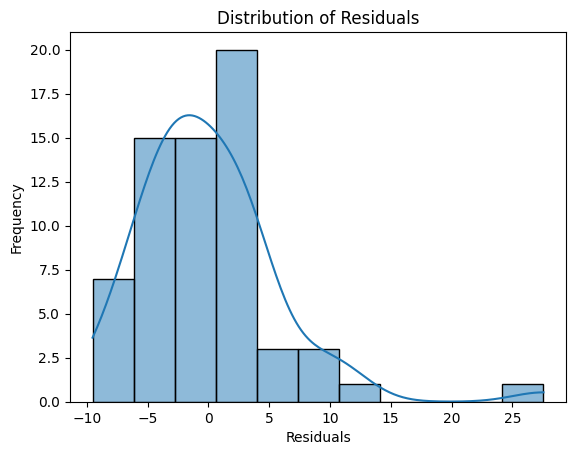

In [52]:
# Check for Normal Distribution of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

### Check for Homoscedasticity

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

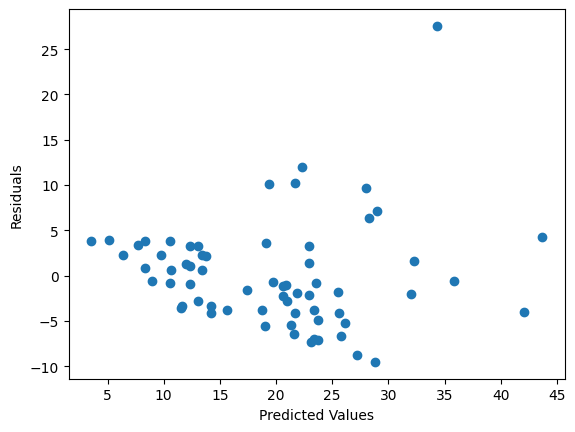

In [53]:
# Check for Homoscedasticity of Residuals
plt.scatter(model.predict(train_df[['Horsepower','MPG.city','Origin_USA','Origin_non-USA']]), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt

Text(0, 0.5, 'Residuals')

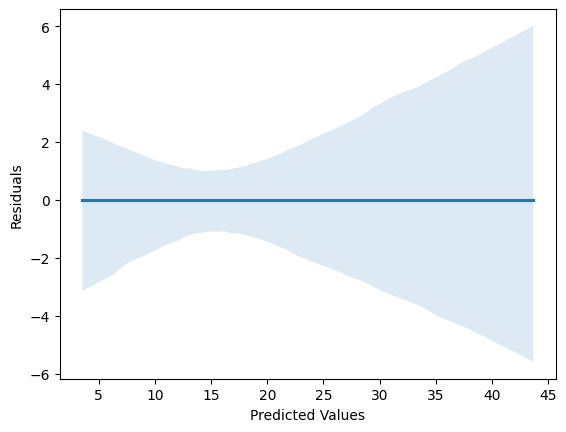

In [54]:
# Fit a line in the plot above
sns.regplot(x=model.predict(train_df[['Horsepower','MPG.city','Origin_USA','Origin_non-USA']]), y=residuals, scatter=False)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')